<a href="https://colab.research.google.com/github/yanamushka/ML-course/blob/main/HW_2_7_%D0%9B%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B7_scikit_learn_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
data_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu/data?select=train.csv'


In [4]:
od.download(data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yanamushka
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 45.1MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu/bank-customer-churn-prediction-dlu.zip to ./bank-customer-churn-prediction-dlu


In [5]:
import os

In [6]:
data_dir = './bank-customer-churn-prediction-dlu'

In [7]:
os.listdir('.')

['.config', 'bank-customer-churn-prediction-dlu', 'sample_data']

In [8]:
os.listdir(data_dir)

['sample_submission.csv', 'train.csv', 'test.csv']

In [9]:
import pandas as pd

In [10]:
raw_data = pd.read_csv('./bank-customer-churn-prediction-dlu/train.csv')

In [11]:
raw_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.569146e+07,658.944133,37.739600,5.025267,42729.791988,1.590933,0.788800,0.489667,117784.666193,0.203467
std,4330.271354,1.352050e+05,72.255926,8.218363,2.776678,59727.309419,0.532306,0.408174,0.499910,45734.445888,0.402590
min,0.000000,1.581102e+06,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3749.750000,1.563514e+07,603.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,83058.140000,0.000000
50%,7499.500000,1.569018e+07,662.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123584.870000,0.000000
75%,11249.250000,1.575718e+07,708.000000,42.000000,7.000000,109531.017500,2.000000,1.000000,1.000000,156884.705000,0.000000
max,14999.000000,1.581569e+07,850.000000,74.000000,10.000000,209767.310000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_df, validate_df = train_test_split(raw_data,test_size = 0.25, random_state=42, stratify = raw_data['Exited'])

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [14]:
input_cols = list(train_df.columns[3:-1])
target_col = 'Exited'

In [219]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [221]:
val_inputs = validate_df[input_cols].copy()
val_targets = validate_df[target_col].copy()

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [222]:
import numpy as np

In [223]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include = 'object').columns.tolist()

In [225]:
train_inputs[numeric_cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000
mean,658.990133,37.688267,5.023467,42952.888064,1.589689,0.792000,0.491111,117904.955965
std,72.120043,8.143175,2.781807,59923.385440,0.531688,0.405895,0.499943,45553.025877
min,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,603.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,83155.870000
50%,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123587.945000
75%,709.000000,42.000000,7.000000,109863.192500,2.000000,1.000000,1.000000,156774.940000
max,850.000000,72.000000,10.000000,209767.310000,4.000000,1.000000,1.000000,199992.480000


In [226]:
train_inputs[categorical_cols].nunique()

,0
Geography,3
Gender,2


4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [227]:
train_inputs.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [228]:
train_inputs[numeric_cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000
mean,658.990133,37.688267,5.023467,42952.888064,1.589689,0.792000,0.491111,117904.955965
std,72.120043,8.143175,2.781807,59923.385440,0.531688,0.405895,0.499943,45553.025877
min,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,603.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,83155.870000
50%,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123587.945000
75%,709.000000,42.000000,7.000000,109863.192500,2.000000,1.000000,1.000000,156774.940000
max,850.000000,72.000000,10.000000,209767.310000,4.000000,1.000000,1.000000,199992.480000


Як бачимо всі колонки мають повні дані, тому необхідності дозаповнювати дані немає.
Серед числових даних бачимо велику різницю в порядку чисел, тому необхідно провести масштабування числових ознак


In [229]:
from sklearn.preprocessing import MinMaxScaler

In [230]:
scaler = MinMaxScaler()

In [231]:
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

In [232]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])


In [233]:
train_inputs[categorical_cols].nunique()

,0
Geography,3
Gender,2


Маємо 2 категоріальні змінні, для використання цих даних для побудови логістичної регресії необхідно перетворити ці дані в числові. Колонку стать можна було б закодувати бінарним кодуванням, але в колонці локації 3 категорії тому кращим варіантом буде використання one-hot кодування для обох стовпців

In [234]:
from sklearn.preprocessing import OneHotEncoder

In [235]:
encoder = OneHotEncoder(sparse_output=False)

In [236]:
encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(sparse_output=False)

In [237]:
encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [238]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [239]:
encoder.transform(train_inputs[categorical_cols])

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.]])

In [240]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [241]:
pd.set_option('display.max_columns', None)

In [242]:
train_inputs.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8263,0.632458,France,Male,0.259259,0.5,0.622726,0.000000,1.0,1.0,0.433916,1.0,0.0,0.0,0.0,1.0
14199,0.479714,Germany,Female,0.259259,0.4,0.571232,0.000000,1.0,0.0,0.888712,0.0,1.0,0.0,1.0,0.0
1856,0.591885,France,Female,0.074074,0.4,0.000000,0.333333,1.0,1.0,0.813017,1.0,0.0,0.0,1.0,0.0
3013,0.653938,France,Male,0.555556,0.3,0.000000,0.333333,1.0,0.0,0.599071,1.0,0.0,0.0,0.0,1.0
8266,0.632458,France,Female,0.314815,0.7,0.000000,0.333333,1.0,0.0,0.502109,1.0,0.0,0.0,1.0,0.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [243]:
!pip install pyarrow --quiet

In [244]:
train_inputs.to_parquet('train_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
val_inputs.to_parquet('val_inputs.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets_parquet')

In [245]:
!ls

bank-customer-churn-prediction-dlu  train_inputs.parquet   val_inputs.parquet
sample_data			    train_targets.parquet  val_targets_parquet


6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [246]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

In [247]:
val_inputs

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1855,0.267303,France,Male,0.203704,0.9,0.570579,0.000000,0.0,0.0,0.279047,1.0,0.0,0.0,0.0,1.0
1273,0.398568,Germany,Male,0.425926,0.3,0.590481,0.000000,1.0,0.0,0.884371,0.0,1.0,0.0,0.0,1.0
5414,0.453461,France,Male,0.240741,0.7,0.000000,0.000000,1.0,1.0,0.751226,1.0,0.0,0.0,0.0,1.0
10923,0.396181,France,Male,0.703704,0.3,0.000000,1.000000,1.0,0.0,0.514675,1.0,0.0,0.0,0.0,1.0
5835,0.758950,Spain,Female,0.444444,0.5,0.000000,0.000000,1.0,1.0,0.909003,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,1.000000,France,Female,0.296296,0.4,0.000000,0.333333,1.0,0.0,0.901755,1.0,0.0,0.0,1.0,0.0
9017,0.675418,France,Female,0.351852,0.6,0.000000,0.333333,1.0,0.0,0.768330,1.0,0.0,0.0,1.0,0.0
9963,0.360382,France,Male,0.185185,0.4,0.470370,0.000000,1.0,0.0,0.287916,1.0,0.0,0.0,0.0,1.0
13573,0.861575,France,Female,0.314815,0.5,0.000000,0.000000,1.0,0.0,0.898307,1.0,0.0,0.0,1.0,0.0


In [248]:
from sklearn.linear_model import LogisticRegression

In [249]:
model = LogisticRegression(solver = 'liblinear')

In [250]:
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [251]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

In [252]:
from sklearn.metrics import confusion_matrix

In [253]:
print(f'Confussion matrix for training: \n {confusion_matrix(train_targets, train_preds)}')
print(f'Confussion matrix for validation: \n {confusion_matrix(val_targets, val_preds)}')

Confussion matrix for training: 
 [[8600  361]
 [1048 1241]]
Confussion matrix for validation: 
 [[2847  140]
 [ 344  419]]


In [254]:
import matplotlib.pyplot as plt

In [255]:
from sklearn.metrics import roc_curve, auc
def compute_auroc_and_build_roc(inputs, targets, name = ''):
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1.0)

  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()


In [256]:
from sklearn.metrics import f1_score
def get_f1_score(inputs, targets, name=''):
  preds = model.predict(inputs)

  f1_score_ = f1_score(targets, preds, pos_label=1.0)
  print(f"F1 score {name}: {f1_score_:.2f}%")

get_f1_score(X_train, train_targets, 'Training')
get_f1_score(X_val, val_targets, 'Validation')

F1 score Training: 0.64%
F1 score Validation: 0.63%


AUROC for Training: 0.88


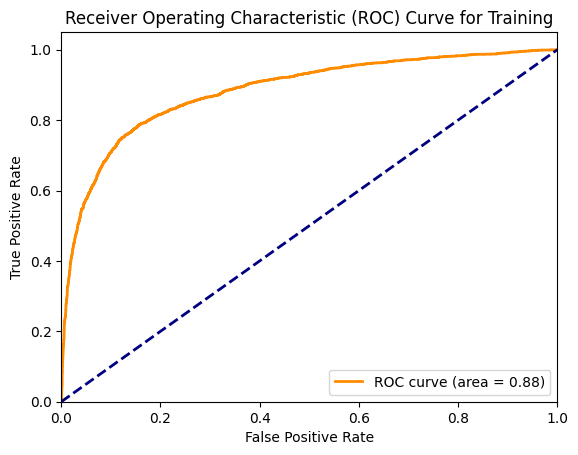

AUROC for Validation: 0.88


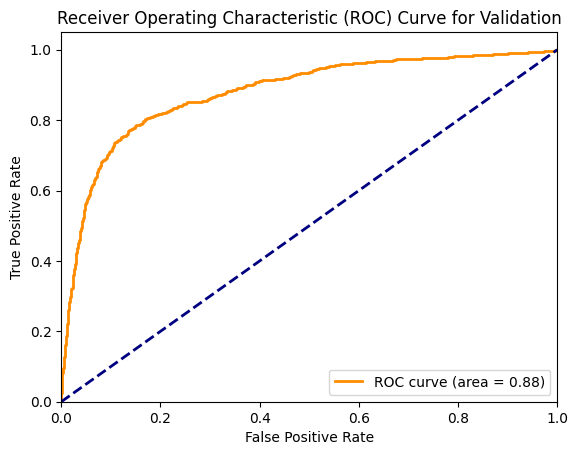

In [270]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

Бачимо, що значення AUROC для тренувального та валідаційного набору даних становлять 0.88. F1-score для тренувальних даних 0.64 для валідаційних 0.63. Хоч значення  F1-score доволі далеко до 1, проте воно все ж більше 0.5,  а можливості провести експеримент з розміткою немає, тому вважаємо це хорошим показником. Значення AUROC доволі високе, тому вважаємо, що це хороша модель.

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [277]:
train_targets.value_counts(normalize = True)

,proportion
Exited,
0.0,0.796533
1.0,0.203467


In [288]:
def major_class(inputs):
  return np.full(len(inputs), 0)

In [293]:
major_train_pred = major_class(X_train)
major_train_val = major_class(X_val)

In [278]:
from sklearn.metrics import accuracy_score

In [297]:
print(f'Модель яка передбачає мажоритарний клас тренувальні дані accuracy: {accuracy_score(train_targets, major_train_pred)}')


Модель яка передбачає мажоритарний клас тренувальні дані accuracy: 0.7965333333333333


In [298]:
print(f'Модель з п.6 тренувальні дані accuracy:{accuracy_score(train_targets, train_preds)}')

Модель з п.6 тренувальні дані accuracy:0.8747555555555555


In [301]:
print(f'Модель яка передбачає мажоритарний клас валідаційні дані accuracy: {accuracy_score(val_targets, major_train_val)}')


Модель яка передбачає мажоритарний клас валідаційні дані accuracy: 0.7965333333333333


In [299]:
print(f'Модель з п.6 валідаційні дані accuracy: {accuracy_score(val_targets, val_preds)}')

Модель з п.6 валідаційні дані accuracy: 0.8709333333333333


Як бачимо значення параметру Accuracy для розрахованої моделі значно вижче ніж для моделі, яка б обирала мажоритарний клас, що свідчить про хорошу якість моделі

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [302]:
import joblib

In [304]:
bank_customer_churn = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [305]:
joblib.dump(bank_customer_churn, 'bank_customer_churn.joblib')

['bank_customer_churn.joblib']

In [306]:
model2 = joblib.load('bank_customer_churn.joblib')

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [309]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [316]:
test_raw_df = pd.read_csv('./bank-customer-churn-prediction-dlu/test.csv')

In [317]:
test_raw_df['Exited']=predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)

In [318]:
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,15000,15594796.0,Chu,0.365155,Germany,Male,0.222222,0.2,0.696265,0.000000,1.0,1.0,0.789477,0.0,1.0,0.0,0.0,1.0,0.074950
1,15001,15642821.0,Mazzi,0.286396,France,Male,0.388889,0.5,0.000000,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,0.0,1.0,0.034767
2,15002,15716284.0,Onyekachi,0.656325,France,Male,0.462963,0.8,0.000000,0.333333,1.0,0.0,0.783859,1.0,0.0,0.0,0.0,1.0,0.150961
3,15003,15785078.0,Martin,0.682578,Spain,Male,0.500000,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.0,0.0,1.0,0.0,1.0,0.196458
4,15004,15662955.0,Kenechukwu,0.384248,Spain,Male,0.462963,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.0,0.0,1.0,0.0,1.0,0.055247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,0.496420,Spain,Male,0.370370,1.0,0.000000,0.333333,1.0,1.0,0.248154,0.0,0.0,1.0,0.0,1.0,0.022104
9996,24996,15739271.0,Clements,0.589499,Spain,Male,0.388889,0.9,0.000000,0.333333,1.0,1.0,0.712578,0.0,0.0,1.0,0.0,1.0,0.026010
9997,24997,15756743.0,Chidiebere,0.818616,France,Male,0.222222,0.9,0.000000,0.333333,1.0,0.0,0.024253,1.0,0.0,0.0,0.0,1.0,0.018501
9998,24998,15680167.0,Yermakova,0.391408,France,Male,0.370370,0.6,0.690650,0.000000,1.0,0.0,0.632348,1.0,0.0,0.0,0.0,1.0,0.152316


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [319]:
sample_submission = pd.read_csv('./bank-customer-churn-prediction-dlu/sample_submission.csv')

In [324]:
sample_submission['Exited'] = test_raw_df['Exited']

In [325]:
sample_submission.head(5)

,id,Exited
0,15000,0.074950
1,15001,0.034767
2,15002,0.150961
3,15003,0.196458
4,15004,0.055247


In [327]:
sample_submission.to_csv('submission_log_reg.csv', index=False)